# Градиентный спуск с выбором шага по правилу Армихо
1) Реализуйте оракула первого порядка для функции $f: \mathbb{R}_{++}^n \rightarrow \mathbb{R};\ f(x) = e^{a^Tx + b} + \sum_{i=1}^{n} c_i x_i \ln x_i,\ a \in \mathbb{R}^n,\ b \in \mathbb{R},\ c = [c_i]_1^n \in \mathbb{R_{+}}^n$, то есть процедуру, которая будет для любой точки возвращать значение функции или градиента в этой точке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Реализуем функции для подсчета значения $f(x)$ и $\nabla{f(x)}$. Градиент функции $f(x)$ равен
$$ \nabla{f(x)} = e^{(b + x^{T}a)} a + \left[ c_{i}(\ln{x_{i}} + 1) \right]_{i = 1}^{n}. $$

In [2]:
def function(a, b, c, x):
    return np.exp(np.sum(a * x) + b) + np.sum(c * x * np.log(x))

In [3]:
def function_gradient(a, b, c, x):
    return np.exp(b + np.sum(x * a)) * a + c * (np.log(x) + 1)

In [4]:
def oracle(a, b, c, x, grad=False):
    """
    Computes f(x) or f'(x).
    
    Arguments:
        a - 1D numpy array
        b - number
        c - nonnegative 1D numpy array of the same length as 'a'
        x - 1D numpy array of the same length as 'a'
        grad - bool
    Returns:
        None if x is not in the domain of f
        f(x) (number) if grad=False
        gradient of f in x (1D numpy array of the same length as 'a') if grad=True
    """
    
    if (not (x > 0).all()):
        return None
    else:
        if (grad == False):
            return function(a, b, c, x)
        else:
            return function_gradient(a, b, c, x)

In [5]:
# Check your function
n = 5
a = np.ones(n) * 0.1
b = 3
c = np.ones(n) * 3
x = np.ones(n) * 2

assert oracle(a, b, c, x) == np.exp(4) + 30 * np.log(2)
assert np.allclose(oracle(a, b, c, x, grad=True), (np.exp(4) / 10 + 3 + 3 * np.log(2)) * np.ones(n))
x[0] = -0.1
assert not oracle(a, b, c, x)

2) Реализуйте выбор шага по правилу Армихо: <br>
$$\alpha_{k} := \beta \alpha_{k-1},\ \text{until} $$<br>
$$f(x-\alpha_{k} \nabla f(x)) \leq f(x) - \varepsilon \langle \nabla f(x), \alpha_{k} \nabla f(x) \rangle $$ <br>
Указание: если $x-\alpha_{k} \nabla f(x)$ лежит вне области определения, нужно повторять  $\alpha_{k} := \beta \alpha_{k - 1} $. Поскольку $x \in \text{dom} f$, при достаточно малом $\alpha_{k}$ точка $x-\alpha_{k} \nabla f(x)$ тоже окажется в области определения.

In [6]:
def Armijo(f, grad, x, alpha, eps, beta):
    """
    Computes stepsize according to Armijo rule.
    
    Arguments:
        f - function such that f(x) returns value of f in x
        grad - gradient of f in x (1D numpy array)
        x - argument from the domain of f (1D numpy array)
        alpha - initial stepsize (positive number)
        eps - number in range (0, 1)
        beta - number in range (0, 1), decay rate
    Returns:
        stepsize (positive number)
    """
    
    while True:
        if (f(x - alpha * grad) is None):
            alpha *= beta
        else:
            if (f(x - alpha * grad) > f(x) - eps * np.sum(alpha * grad ** 2)):
                alpha *= beta
            else:
                break
                
    return alpha

In [7]:
# Check your code
n = 5
a = np.ones(n) * 0.1
b = 3
c = np.ones(n) * 3
f = lambda x: oracle(a, b, c, x)

x = np.ones(n)
grad = oracle(a, b, c, x, grad=True)

alpha_0 = 1
eps = 0.5
beta = 0.7

assert (Armijo(f, grad, x, alpha_0, eps, beta) - 0.1176) < 1e-4

3) Реализуйте градиентный спуск.

In [8]:
def grad_descent(f, compute_grad, choose_step, x, N):
    """
    Minimizes f via gradient descent.
    
    Arguments:
        f - function such that f(x) returns value of f in x
        compute_grad - function such that grad(x) returns grad of f in x
        choose_step - function such that choose_step(x, grad) returns stepsize
        x - starting point from domain of f (1D numpy array)
        N - maximal number of iterations
    Returns:
        trajectory of gradient descent (list of 1D numpy arrays)
    """
    current_x = x
    trajectory = np.array([current_x])
    num_iterations = 0
    
    while True:
        num_iterations += 1
        grad = compute_grad(current_x)
        alpha = choose_step(current_x, grad)
        current_x -= alpha * grad
        trajectory = np.append(trajectory, [current_x], axis = 0)
        
        if num_iterations >= N:
            break
            
    return trajectory

Рассмотрим двумерный случай: $x\in R^2$. Нарисуем линии уровня функции.

<a list of 13 text.Text objects>

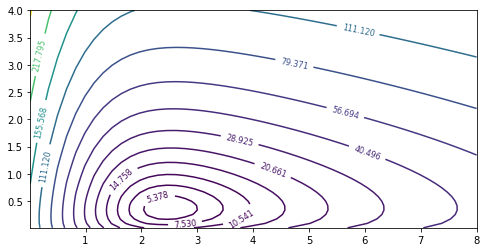

In [9]:
n = 2
a = np.array([-1.5, 0.1])
b = 5
c = np.array([3, 17.])
x = np.linspace(0.01, 8, 50)
y = np.linspace(0.01, 4, 50)
x1, x2 = np.meshgrid(x, y)

func = lambda x: oracle(a, b, c, x)

def f(x1, x2):
    """
    Returns a matrix of function values.
    
    Arguments:
        x1 - 2D numpy array with values of first coordinate
        x2 - 2D numpy array with values of second coordinate
        
    Returns:
        2D numpy array with function values
    """
    global func
    
    z = np.zeros_like(x1)
    for i in range(x1.shape[0]):
        for j in range(x1.shape[1]):
            point = [x1[i, j], x2[i, j]]
            x = np.array(point)
            z[i, j] = func(x)
    
    return z

z = f(x1, x2)

fig, ax = plt.subplots(figsize=(8, 4))
levels = [1.4 ** i for i in range(2, 20)]
contours = ax.contour(x1, x2, z, levels)
ax.clabel(contours, inline=True, fontsize=8)

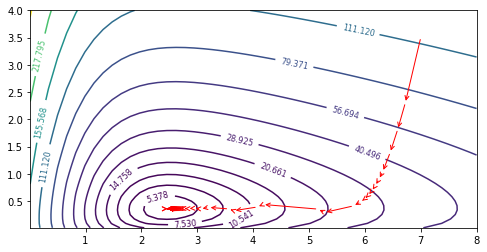

In [10]:
compute_grad = lambda x: oracle(a, b, c, x, grad=True)

alpha_0 = 1
eps = 0.9
beta = 0.5
choose_step = lambda x, grad: Armijo(func, grad, x, alpha_0, eps, beta)

x = np.array([7, 3.5]) # starting point

trajectory = grad_descent(func, compute_grad, choose_step, x, 1000)

for j in range(1, len(trajectory)):
    ax.annotate('', xy=trajectory[j], xytext=trajectory[j - 1], arrowprops={'arrowstyle': '->', 'color':'r'})
fig